# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [1]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore
from GMetrics.plotters import cornerplotter, plot_corr_matrix # type: ignore

sys.path.insert(0,'utils_func/')
import MixtureDistributions # type: ignore
from optimizers_unimodal import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results_leonardo/5D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-16 16:05:54.933505: Importing os...
2024-04-16 16:05:54.933648: Importing sys...
Visible devices: [1]
2024-04-16 16:05:54.933887: Importing timer from timeit...
2024-04-16 16:05:54.933956: Setting env variables for tf import (only device(s) [1] will be available)...
2024-04-16 16:05:54.934089: Importing numpy...
2024-04-16 16:05:55.042239: Importing matplotlib...
2024-04-16 16:05:55.391256: Importing h5py...
2024-04-16 16:05:55.414446: Importing importlib.util...
2024-04-16 16:05:55.414546: Importing json...
2024-04-16 16:05:55.414609: Importing pandas...
2024-04-16 16:05:55.834939: Importing random...
2024-04-16 16:05:55.835074: Importing scipy utils...
2024-04-16 16:05:56.226509: Importing subprocess...
2024-04-16 16:05:56.226638: Importing tensorflow...
Tensorflow version: 2.16.1
2024-04-16 16:05:59.409355: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-04-16 16:06:00.530373: Importing timeit...
2024-04-16 16:06:00.530467: Importing tqdm...
2

/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-04-16 16:06:05.114144: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #1, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-04-16 16:06:05.143561: All done.


# Model definition

In [3]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = 0.,
                                                             eps_scale = 0.,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
dist_2 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = eps_loc,
                                                             eps_scale = eps_scale,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


# Fixed $n=20000$

## Null hypotheses

### Model definition

In [4]:
batch_size_test = 20_000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 200000000
batch_size 20000
niter 10000
niter * batch_size 200000000
small_sample False


In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 20_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,20000,10000,10000000,float64,0,True,False,None,True,...,5,0,True,5,0,float64,5,200000000,False,3


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 2000, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 5000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 20000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 200000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 2000,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': 'results_leonardo/5D_unimodal/5D_20K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  '

### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from results_leonardo/5D_unimodal/5D_20K/null_hypothesis/FN.json
Loading fpd from results_leonardo/5D_unimodal/5D_20K/null_hypothesis/FPD.json
Loading kpd from results_leonardo/5D_unimodal/5D_20K/null_hypothesis/KPD.json
Loading ks from results_leonardo/5D_unimodal/5D_20K/null_hypothesis/KS.json
Loading sks from results_leonardo/5D_unimodal/5D_20K/null_hypothesis/SKS.json


Loading swd from results_leonardo/5D_unimodal/5D_20K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.6890541237472889], [0.95, [9500, 500], 1.0625020452814147], [0.99, [9900, 100], 1.3159444036652925]]
Computing time for metric fn: 8.453927748138085
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.4998882356462574], [0.95, [9500, 500], 0.5731660823966901], [0.99, [9900, 100], 0.6421035327711611]]
Computing time for metric fpd: 139.20650215400383
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.07506427426084983], [0.95, [9500, 500], 0.026816479452573816], [0.99, [9900, 100], 0.0979364733544319]]
Computing time for metric kpd: 18889.198505387176
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9189987182617188], [0.95, [9500, 500], 1.1540013551712036], [0.99, [9900, 100], 1.3230007886886597]]
Computing time for metric ks: 32.84431957802735
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9092509746551514], [0.95, [9500, 500], 1.091250404715538], [0.99, [9900, 100], 1.2057003565132618]]
Computing time for metric sks: 393.35783054

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7efa3000ec00>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 20000, 'ba...",2000,$\overline{\|\cdot\|}_{F}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.6890541237472889], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7efa3000d940>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 20000, 'ba...",500,$d_{\mathrm{FPD}}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.4998882356462574], [0...."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7efa3000ed40>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 20000, 'ba...",1,$d_{\mathrm{KPD}}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], -0.07506427426084983], [..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7efa3000f060>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",5000,$\overline{D}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.9189987182617188], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7efa3000f100>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$\widetilde{D}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.9092509746551514], [0...."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7efa3000f1a0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$\widetilde{W}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.5734886359764801], [0...."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7efa3000f240>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",1000,$t_{\mu}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,[]


### Plots of null-distributions

mu = 0.6024985275667516 +/- 0.000606267781745551
sigma = 0.24622505594385616 +/- 0.0019827736184683804


/tmp/ipykernel_397751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_397751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_397751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_397751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


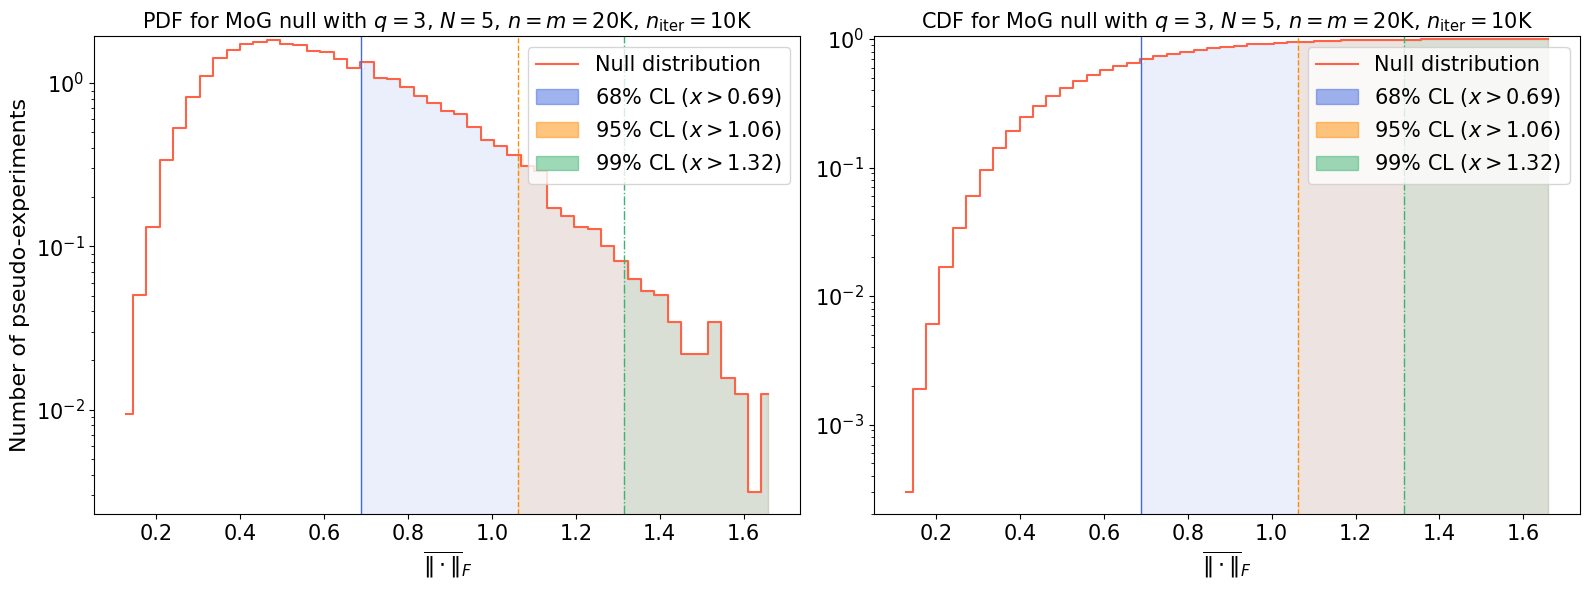

Time elapsed: 1.3109589850064367 seconds.
mu = 0.49165975685205004 +/- 1.913716497671636e-05
sigma = 0.04374604550895585 +/- 0.0008011514029874044


/tmp/ipykernel_397751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_397751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_397751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_397751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


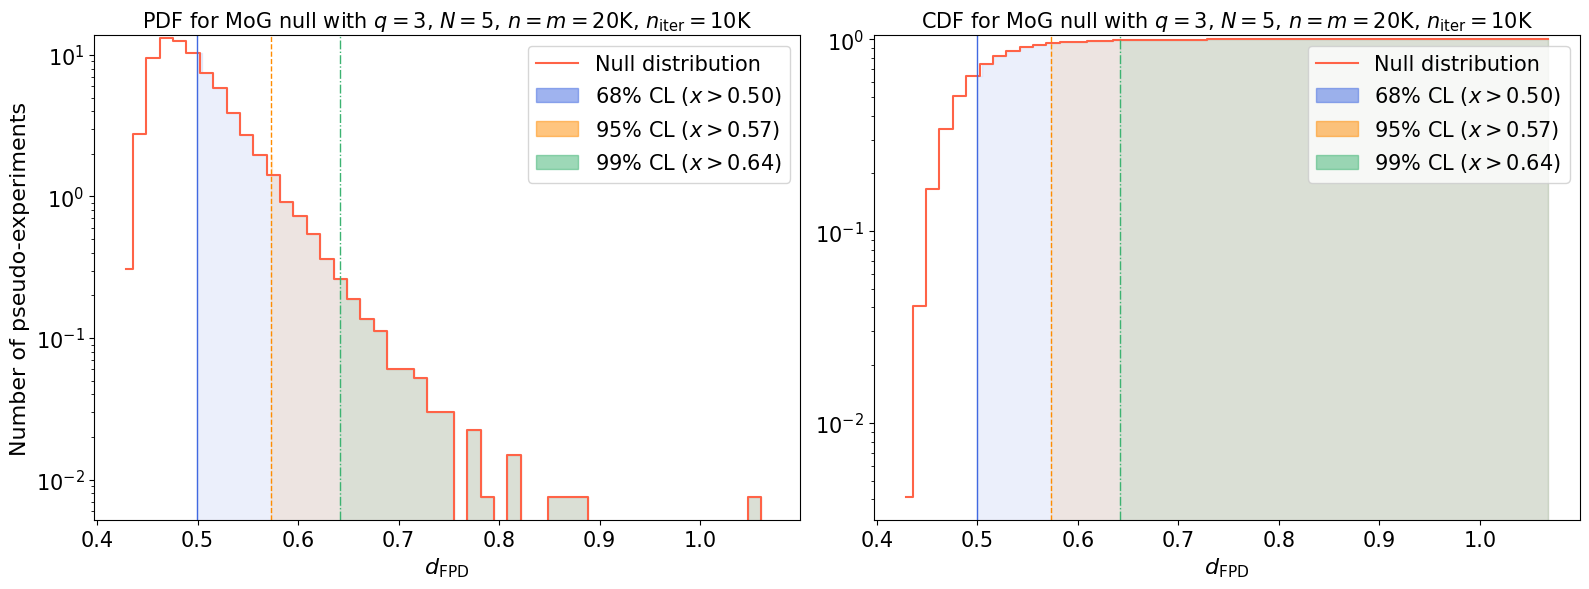

Time elapsed: 0.987594187958166 seconds.
mu = -0.10623917130970129 +/- 5.7516305657190926e-05
sigma = 0.07583950531035322 +/- 0.0005777919407022749


/tmp/ipykernel_397751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_397751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_397751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_397751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


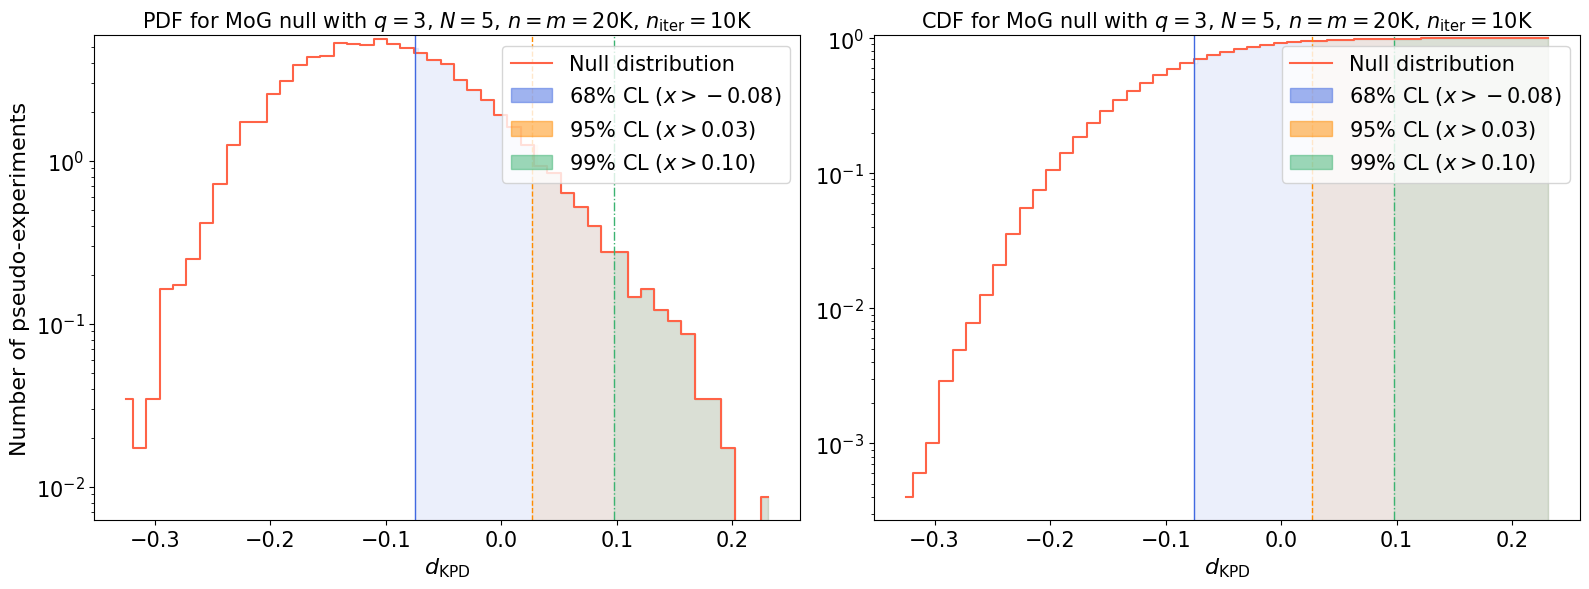

Time elapsed: 0.9876988469623029 seconds.
mu = 0.8667965846341104 +/- 0.0002376027625210832
sigma = 0.15414368703293793 +/- 0.0013175946166409012


/tmp/ipykernel_397751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_397751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_397751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_397751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


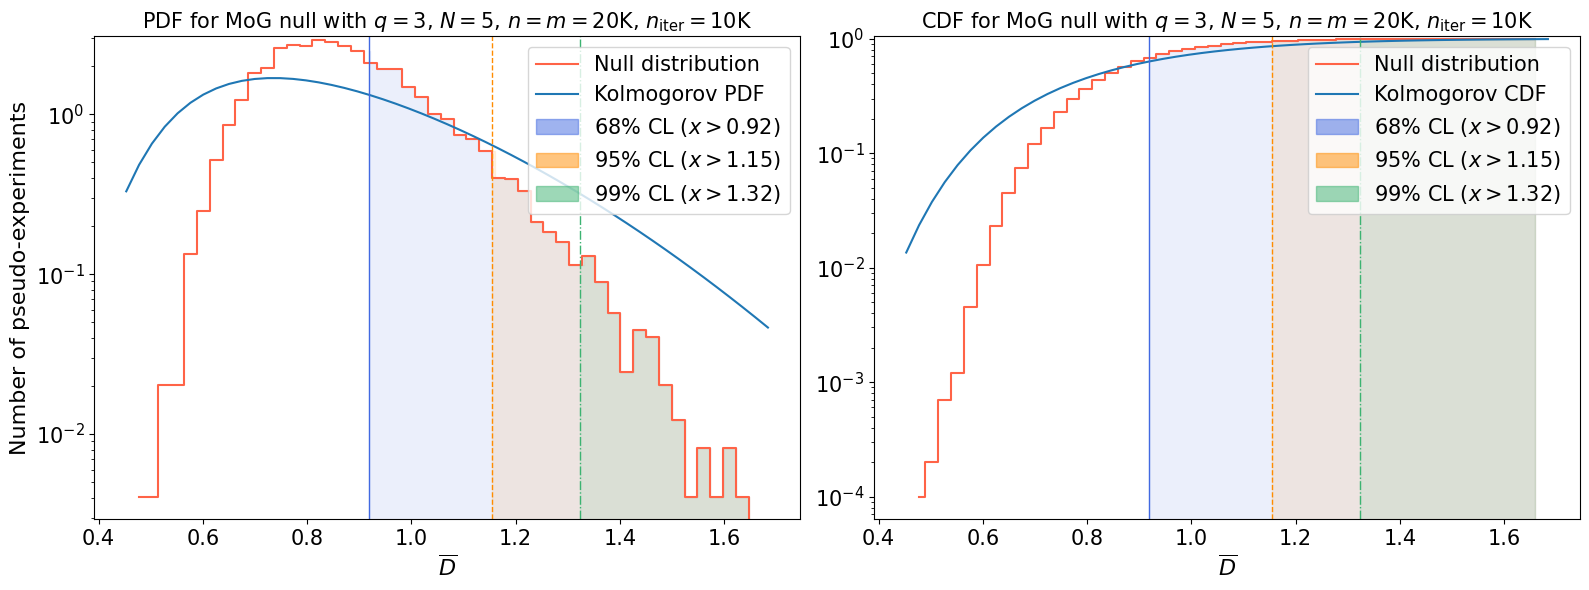

Time elapsed: 1.3849105280824006 seconds.
mu = 0.8667149733239785 +/- 0.00014398077220061515
sigma = 0.11999198814946568 +/- 0.0009926774399841225


/tmp/ipykernel_397751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_397751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_397751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_397751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


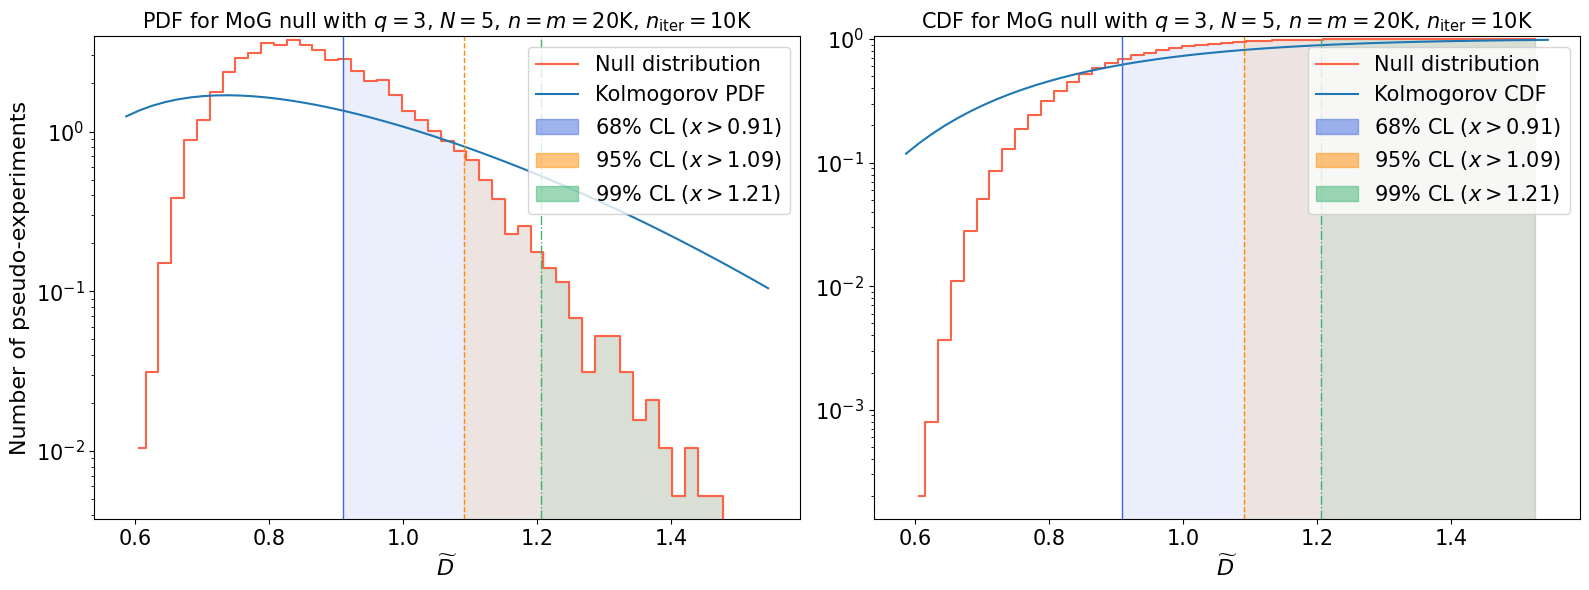

Time elapsed: 1.330029000993818 seconds.
mu = 0.5426403833057082 +/- 0.00011451676886279781
sigma = 0.1070125080833067 +/- 0.0010074217736619003


/tmp/ipykernel_397751/3831742232.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_397751/3831742232.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_397751/3831742232.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_397751/3831742232.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


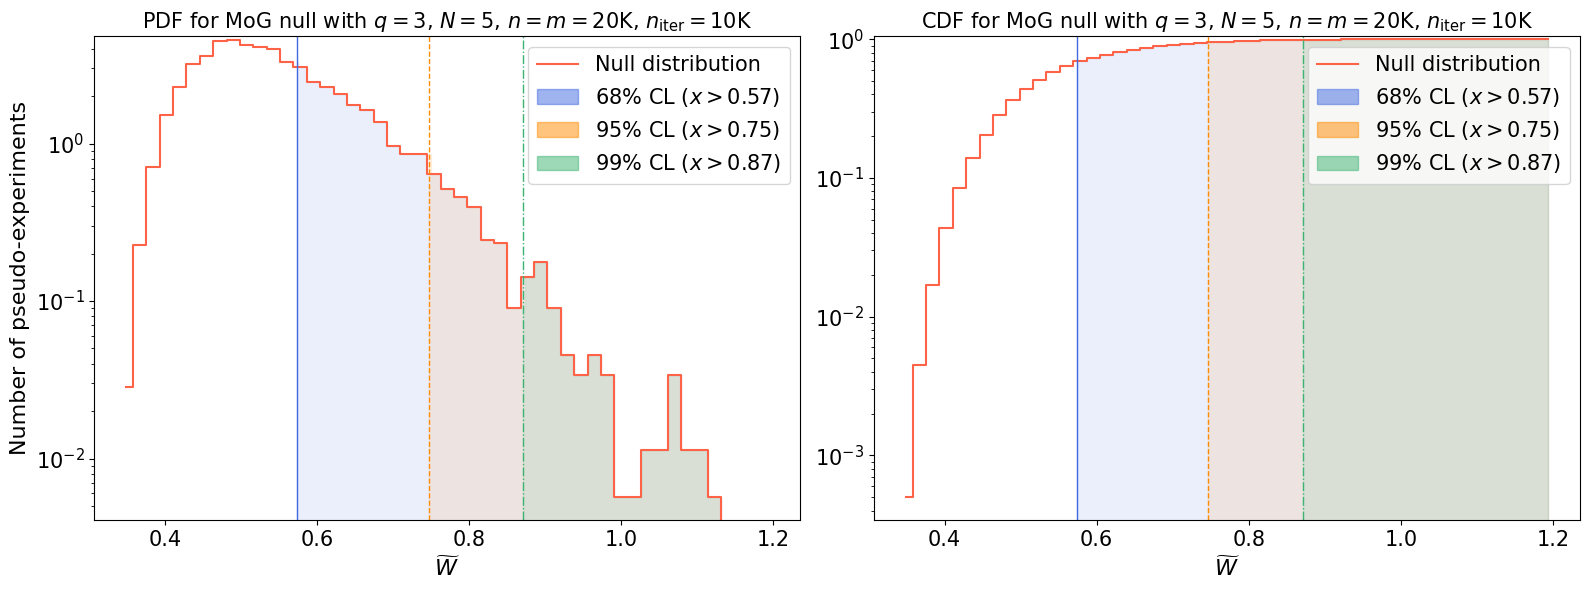

Time elapsed: 0.9863862569909543 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f7e6d2c6de0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 20000, 'ba...",2000,$\overline{\|\cdot\|}_{F}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.6890541237472889], [0....",results_leonardo/5D_unimodal/5D_20K/null_hypot...
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f7e6d2c6e80>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 20000, 'ba...",500,$d_{\mathrm{FPD}}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.4998882356462574], [0....",results_leonardo/5D_unimodal/5D_20K/null_hypot...
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f7e6d2c6f20>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 20000, 'ba...",1,$d_{\mathrm{KPD}}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], -0.07506427426084983], [...",results_leonardo/5D_unimodal/5D_20K/null_hypot...
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f7e6d2c7240>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",5000,$\overline{D}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.9189987182617188], [0....",results_leonardo/5D_unimodal/5D_20K/null_hypot...
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f7e6d2c72e0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$\widetilde{D}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.9092509746551514], [0....",results_leonardo/5D_unimodal/5D_20K/null_hypot...
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f7e6d2c7380>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",200,$\widetilde{W}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,"[[0.68, [6800, 3199], 0.5734886359764801], [0....",results_leonardo/5D_unimodal/5D_20K/null_hypot...
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f7e6d2c7420>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 20000, 'ba...",1000,$t_{\mu}$,results_leonardo/5D_unimodal/5D_20K/null_hypot...,[],NaN


In [13]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [12]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [13]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [15]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with off deformation already loaded.
Exclusion limits for fn with cov deformation already loaded.
Exclusion limits for fn with mean_std deformation already loaded.
Exclusion limits for fn with mean_off deformation already loaded.
Exclusion limits for fn with mean_cov deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with off deformation already loaded.
Exclusion limits for fpd with cov deformation already loaded.
Exclusion limits for fpd with mean_std deformation already loaded.
Exclusion limits for fpd with mean_off deformation already loaded.
Exclusion limits for fpd with mean_cov deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformatio

### Likelihood-ratio test

In [16]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [17]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.1,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 20000
nchunks = 10
Iterating from 0 to 1000 out of 10000 .


Iterating from 1000 to 2000 out of 10000 .
Iterating from 2000 to 3000 out of 10000 .
Iterating from 3000 to 4000 out of 10000 .
Iterating from 4000 to 5000 out of 10000 .
Iterating from 5000 to 6000 out of 10000 .
Iterating from 6000 to 7000 out of 10000 .
Iterating from 7000 to 8000 out of 10000 .
Iterating from 8000 to 9000 out of 10000 .
Iterating from 9000 to 10000 out of 10000 .
LR metric calculation completed in 18.161082312930375 seconds.
Saving lr to results_leonardo/5D_unimodal/5D_20K/null_hypothesis/LR_mean_0.050000.json
ThresholdS: [[0.95, [9500, 500], -106.7794323277383], [0.99, [9900, 100], -93.2207379755478]]
Null distribution computed in 18.42002884997055 seconds
Evaluating alternative distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dis

### Show and save results

In [18]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr


In [19]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_off = results_df[results_df["Deformation"] == "off"]
results_df_cov = results_df[results_df["Deformation"] == "cov"]
results_df_mean_std = results_df[results_df["Deformation"] == "mean_std"]
results_df_mean_off = results_df[results_df["Deformation"] == "mean_off"]
results_df_mean_cov = results_df[results_df["Deformation"] == "mean_cov"]

In [20]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
42,lr,mean,5,10000,20000,0.00509,0.00758,616
7,fpd,mean,5,10000,20000,0.02296,0.03101,134
35,swd,mean,5,10000,20000,0.02296,0.03041,123
28,sks,mean,5,10000,20000,0.02312,0.02957,192
21,ks,mean,5,10000,20000,0.03189,0.04266,105
0,fn,mean,5,10000,20000,0.03311,0.04509,85
14,kpd,mean,5,10000,20000,0.23899,0.24916,637


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
42,lr,0.00509,0.00758,616
7,fpd,0.02296,0.03101,134
35,swd,0.02296,0.03041,123
28,sks,0.02312,0.02957,192
21,ks,0.03189,0.04266,105
0,fn,0.03311,0.04509,85
14,kpd,0.23899,0.24916,637


In [21]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
43,lr,std,5,10000,20000,0.00135,0.00207,658
8,fpd,std,5,10000,20000,0.01610,0.02211,141
36,swd,std,5,10000,20000,0.02388,0.03193,122
1,fn,std,5,10000,20000,0.02434,0.03147,82
29,sks,std,5,10000,20000,0.02617,0.03421,190
22,ks,std,5,10000,20000,0.04623,0.06286,98
15,kpd,std,5,10000,20000,2.47192,2.58796,450


,Statistic,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
43,lr,0.00135,0.00207,658
8,fpd,0.01610,0.02211,141
36,swd,0.02388,0.03193,122
1,fn,0.02434,0.03147,82
29,sks,0.02617,0.03421,190
22,ks,0.04623,0.06286,98
15,kpd,2.47192,2.58796,450


In [22]:
sorted_df_off = results_df_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_off)
sorted_df_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_off)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)
44,lr,off,5,10000,20000,0.00067,0.00103,714
9,fpd,off,5,10000,20000,0.00889,0.01205,152
2,fn,off,5,10000,20000,0.01087,0.01403,89
37,swd,off,5,10000,20000,0.01686,0.02317,123
30,sks,off,5,10000,20000,0.01732,0.02302,195
23,ks,off,5,10000,20000,0.04745,0.06348,102
16,kpd,off,5,10000,20000,2.22137,2.35027,506


,Statistic,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)
44,lr,0.00067,0.00103,714
9,fpd,0.00889,0.01205,152
2,fn,0.01087,0.01403,89
37,swd,0.01686,0.02317,123
30,sks,0.01732,0.02302,195
23,ks,0.04745,0.06348,102
16,kpd,2.22137,2.35027,506


In [23]:
sorted_df_cov = results_df_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_cov)
sorted_df_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}}$ (s)
45,lr,cov,5,10000,20000,0.00930,0.01298,541
10,fpd,cov,5,10000,20000,0.02388,0.03314,142
38,swd,cov,5,10000,20000,0.03250,0.04296,121
24,ks,cov,5,10000,20000,0.04562,0.06286,103
31,sks,cov,5,10000,20000,0.04562,0.05878,185
3,fn,cov,5,10000,20000,0.10773,0.14535,69
17,kpd,cov,5,10000,20000,1.94641,2.08806,484


,Statistic,$\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}}$ (s)
45,lr,0.00930,0.01298,541
10,fpd,0.02388,0.03314,142
38,swd,0.03250,0.04296,121
24,ks,0.04562,0.06286,103
31,sks,0.04562,0.05878,185
3,fn,0.10773,0.14535,69
17,kpd,1.94641,2.08806,484


In [24]:
sorted_df_mean_std = results_df_mean_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_mean_std)
sorted_df_mean_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
46,lr,mean_std,5,10000,20000,0.00128,0.00196,671
11,fpd,mean_std,5,10000,20000,0.01301,0.01780,153
39,swd,mean_std,5,10000,20000,0.01625,0.02180,129
32,sks,mean_std,5,10000,20000,0.01656,0.02104,203
4,fn,mean_std,5,10000,20000,0.02113,0.02805,85
25,ks,mean_std,5,10000,20000,0.02480,0.03315,112
18,kpd,mean_std,5,10000,20000,0.23335,0.24309,610


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
46,lr,0.00128,0.00196,671
11,fpd,0.01301,0.01780,153
39,swd,0.01625,0.02180,129
32,sks,0.01656,0.02104,203
4,fn,0.02113,0.02805,85
25,ks,0.02480,0.03315,112
18,kpd,0.23335,0.24309,610


In [25]:
sorted_df_mean_off = results_df_mean_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_mean_off)
sorted_df_mean_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_off)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)
47,lr,mean_off,5,10000,20000,0.00066,0.00101,720
12,fpd,mean_off,5,10000,20000,0.00820,0.01121,160
5,fn,mean_off,5,10000,20000,0.01057,0.01380,89
33,sks,mean_off,5,10000,20000,0.01301,0.01689,210
40,swd,mean_off,5,10000,20000,0.01324,0.01788,132
26,ks,mean_off,5,10000,20000,0.02495,0.03299,114
19,kpd,mean_off,5,10000,20000,0.23243,0.24189,613


,Statistic,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)
47,lr,0.00066,0.00101,720
12,fpd,0.00820,0.01121,160
5,fn,0.01057,0.01380,89
33,sks,0.01301,0.01689,210
40,swd,0.01324,0.01788,132
26,ks,0.02495,0.03299,114
19,kpd,0.23243,0.24189,613


In [26]:
sorted_df_mean_cov = results_df_mean_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_mean_cov)
sorted_df_mean_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_cov)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}}$ (s)
48,lr,mean_cov,5,10000,20000,0.00428,0.00622,612
13,fpd,mean_cov,5,10000,20000,0.01595,0.02211,153
41,swd,mean_cov,5,10000,20000,0.01839,0.02454,125
34,sks,mean_cov,5,10000,20000,0.02007,0.02561,206
27,ks,mean_cov,5,10000,20000,0.02449,0.03284,116
6,fn,mean_cov,5,10000,20000,0.03098,0.04205,81
20,kpd,mean_cov,5,10000,20000,0.23102,0.24062,542


,Statistic,$\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}}$ (s)
48,lr,0.00428,0.00622,612
13,fpd,0.01595,0.02211,153
41,swd,0.01839,0.02454,125
34,sks,0.02007,0.02561,206
27,ks,0.02449,0.03284,116
6,fn,0.03098,0.04205,81
20,kpd,0.23102,0.24062,542


In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_off, on='Statistic', how='outer').merge(sorted_df_cov, on='Statistic', how='outer').merge(sorted_df_mean_std, on='Statistic', how='outer').merge(sorted_df_mean_off, on='Statistic', how='outer').merge(sorted_df_mean_cov, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|llr|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}-\Sigma_{ii}}$ (s),...,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s),$\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}}$ (s),$t^{\mathrm{null}}$ (s)
0,$\overline{\|\cdot\|}_{F}$,0.05600,0.07260,73,0.03403,0.04357,75,0.01534,0.01952,81,...,0.03250,0.04205,77,0.01564,0.01982,81,0.04990,0.06530,76,7
1,$d_{\mathrm{FPD}}$,0.03464,0.05146,124,0.02144,0.03192,133,0.01194,0.01613,143,...,0.01961,0.02546,144,0.01087,0.01597,152,0.02434,0.03147,143,98
2,$d_{\mathrm{KPD}}$,0.38940,0.41755,112,3.97461,4.28703,72,3.83789,4.14658,68,...,0.37659,0.40311,123,0.37231,0.39999,119,0.37720,0.40372,118,2083
3,$\overline{D}$,0.04257,0.05543,124,0.06683,0.08701,117,0.06622,0.08881,118,...,0.03403,0.04357,132,0.03342,0.04327,133,0.03342,0.04266,130,26
4,$t_{\mathrm{LLR}}$,0.01040,0.01377,329,0.00184,0.00274,413,0.00089,0.00138,467,...,0.00193,0.00295,419,0.00092,0.00143,456,0.00861,0.01112,411,-
5,$\widetilde{D}$,0.03067,0.04022,200,0.03372,0.04539,203,0.02190,0.03033,214,...,0.02129,0.02790,222,0.01656,0.02226,222,0.02602,0.03406,220,324
6,$\widetilde{W}$,0.02953,0.03999,128,0.03220,0.04417,129,0.02251,0.03177,128,...,0.02098,0.02881,132,0.01717,0.02378,141,0.02388,0.03254,128,251


\begin{tabular}{l|llr|llr|llr|llr|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$ & $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$ & $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s) & $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$ & $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$ & $t^{\Sigma_{ij}}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$ & $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s) & $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$ & $t^{\mu-\Sigma_{ij}}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$\overline{\|\cdot\|}_{F}$ & 0.056 & 0.073